In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv("drive/MyDrive/pca_reduced_dataset.csv")

In [4]:
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Dataset split: 80% training, 20% testing")
print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

Dataset split: 80% training, 20% testing
Training set: (5634, 14)
Test set: (1409, 14)


Variety 1 - Basic MLP

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nInput features: {X_train_scaled.shape[1]}")


Input features: 14


In [6]:
tf.keras.backend.clear_session()

# Build basic MLP model
basic_mlp = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
basic_mlp.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("Basic MLP Architecture:")
basic_mlp.summary()


Basic MLP Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,073 (12.00 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model
print("\nTraining Basic MLP...")
history_basic = basic_mlp.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# Make predictions
y_pred_proba_basic = basic_mlp.predict(X_test_scaled).flatten()
y_pred_basic = (y_pred_proba_basic > 0.5).astype(int)



Training Basic MLP...
Epoch 1/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7270 - loss: 0.5409 - val_accuracy: 0.7897 - val_loss: 0.4505
Epoch 2/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7857 - loss: 0.4500 - val_accuracy: 0.7826 - val_loss: 0.4446
Epoch 3/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7999 - loss: 0.4380 - val_accuracy: 0.7941 - val_loss: 0.4419
Epoch 4/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7985 - loss: 0.4426 - val_accuracy: 0.7933 - val_loss: 0.4417
Epoch 5/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7934 - loss: 0.4324 - val_accuracy: 0.7862 - val_loss: 0.4418
Epoch 6/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7978 - loss: 0.4344 - val_accuracy: 0.7862 - val_loss: 0.4419
Epoch 7/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7898 - loss: 0.4387 - val_accuracy: 0.7888 - val_loss: 0.4414
Epoch 8/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8084 - 

In [9]:
accuracy_basic = accuracy_score(y_test, y_pred_basic)
precision_basic = precision_score(y_test, y_pred_basic)
recall_basic = recall_score(y_test, y_pred_basic)
f1_basic = f1_score(y_test, y_pred_basic)
auc_basic = roc_auc_score(y_test, y_pred_proba_basic)

print(f"Accuracy:  {accuracy_basic:.4f}")
print(f"Precision: {precision_basic:.4f}")
print(f"Recall:    {recall_basic:.4f}")
print(f"F1-Score:  {f1_basic:.4f}")
print(f"AUC-ROC:   {auc_basic:.4f}")

Accuracy:  0.7842
Precision: 0.6029
Recall:    0.5481
F1-Score:  0.5742
AUC-ROC:   0.8323


Confusion Matrix:
[[900 135]
 [169 205]]


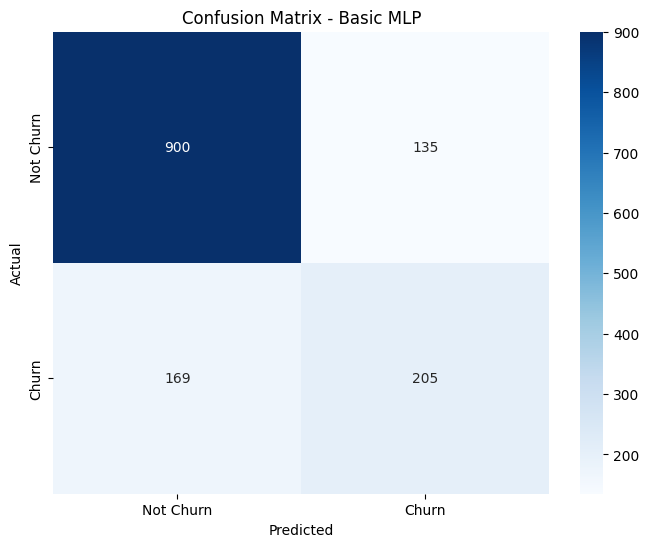

In [11]:
cm_basic = confusion_matrix(y_test, y_pred_basic)
print("Confusion Matrix:")
print(cm_basic)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_basic, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Basic MLP')
plt.show()

In [12]:
print("Classification Report:")
print(classification_report(y_test, y_pred_basic))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1035
           1       0.60      0.55      0.57       374

    accuracy                           0.78      1409
   macro avg       0.72      0.71      0.71      1409
weighted avg       0.78      0.78      0.78      1409



Variety 2 - Deeper MLP

In [20]:
tf.keras.backend.clear_session()

# Build deeper MLP model
deeper_mlp = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
deeper_mlp.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("Deeper MLP Architecture:")
deeper_mlp.summary()



Deeper MLP Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,057 (51.00 KB)

 Trainable params: 12,673 (49.50 KB)

 Non-trainable params: 384 (1.50 KB)

In [21]:
# Train the model
print("\nTraining Deeper MLP...")
history_deeper = deeper_mlp.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# Make predictions
y_pred_proba_deeper = deeper_mlp.predict(X_test_scaled).flatten()
y_pred_deeper = (y_pred_proba_deeper > 0.5).astype(int)


Training Deeper MLP...
Epoch 1/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6498 - loss: 0.6631 - val_accuracy: 0.7693 - val_loss: 0.4913
Epoch 2/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7602 - loss: 0.4782 - val_accuracy: 0.7799 - val_loss: 0.4531
Epoch 3/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7758 - loss: 0.4772 - val_accuracy: 0.7844 - val_loss: 0.4500
Epoch 4/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7878 - loss: 0.4508 - val_accuracy: 0.7808 - val_loss: 0.4468
Epoch 5/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7776 - loss: 0.4478 - val_accuracy: 0.7870 - val_loss: 0.4455
Epoch 6/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7936 - loss: 0.4400 - val_accuracy: 0.7888 - val_loss: 0.4436
Epoch 7/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8014 - loss: 0.4254 - val_accuracy: 0.7888 - val_loss: 0.4397
Epoch 8/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7903 -

In [14]:
accuracy_deeper = accuracy_score(y_test, y_pred_deeper)
precision_deeper = precision_score(y_test, y_pred_deeper)
recall_deeper = recall_score(y_test, y_pred_deeper)
f1_deeper = f1_score(y_test, y_pred_deeper)
auc_deeper = roc_auc_score(y_test, y_pred_proba_deeper)

print(f"Accuracy:  {accuracy_deeper:.4f}")
print(f"Precision: {precision_deeper:.4f}")
print(f"Recall:    {recall_deeper:.4f}")
print(f"F1-Score:  {f1_deeper:.4f}")
print(f"AUC-ROC:   {auc_deeper:.4f}")

Accuracy:  0.7899
Precision: 0.6189
Recall:    0.5428
F1-Score:  0.5783
AUC-ROC:   0.8338


Confusion Matrix:
[[910 125]
 [171 203]]


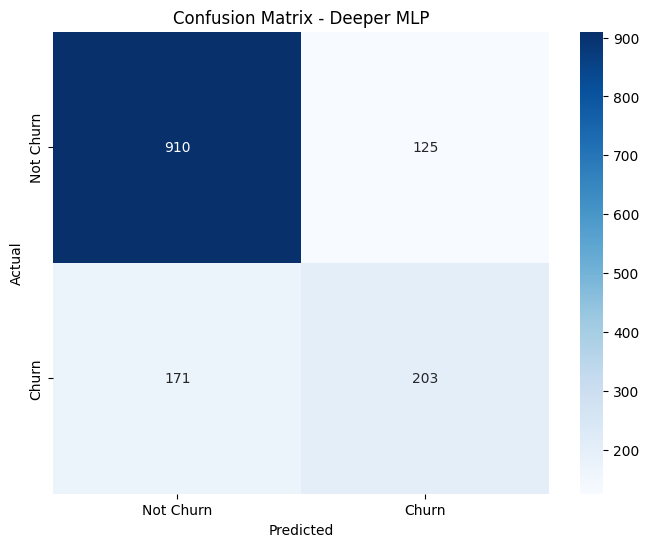

In [16]:
cm_deeper = confusion_matrix(y_test, y_pred_deeper)
print("Confusion Matrix:")
print(cm_deeper)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_deeper, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Deeper MLP')
plt.show()

In [17]:
print("Classification Report:")
print(classification_report(y_test, y_pred_deeper))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1035
           1       0.62      0.54      0.58       374

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409



Variety 3 - Tuned MLP with Regularization

In [18]:
tf.keras.backend.clear_session()

# Build tuned MLP model with regularization
tuned_mlp = keras.Sequential([
    layers.Dense(256, activation='relu',
                kernel_regularizer=keras.regularizers.l2(0.001),
                input_shape=(X_train_scaled.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu',
                kernel_regularizer=keras.regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model with custom optimizer
tuned_mlp.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("Tuned MLP Architecture:")
tuned_mlp.summary()


Tuned MLP Architecture:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         3,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,897 (191.00 KB)

 Trainable params: 48,001 (187.50 KB)

 Non-trainable params: 896 (3.50 KB)

In [19]:
reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=0.0001
)

# Train the model
print("\nTraining Tuned MLP...")
history_tuned = tuned_mlp.fit(
    X_train_scaled, y_train,
    epochs=150,
    batch_size=16,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Make predictions
y_pred_proba_tuned = tuned_mlp.predict(X_test_scaled).flatten()
y_pred_tuned = (y_pred_proba_tuned > 0.5).astype(int)


Training Tuned MLP...
Epoch 1/150
282/282 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6458 - loss: 0.8721 - val_accuracy: 0.7862 - val_loss: 0.7009 - learning_rate: 5.0000e-04
Epoch 2/150
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7546 - loss: 0.7075 - val_accuracy: 0.7773 - val_loss: 0.6563 - learning_rate: 5.0000e-04
Epoch 3/150
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7495 - loss: 0.7030 - val_accuracy: 0.7808 - val_loss: 0.6414 - learning_rate: 5.0000e-04
Epoch 4/150
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7744 - loss: 0.6408 - val_accuracy: 0.7764 - val_loss: 0.6310 - learning_rate: 5.0000e-04
Epoch 5/150
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7884 - loss: 0.6358 - val_accuracy: 0.7879 - val_loss: 0.6211 - learning_rate: 5.0000e-04
Epoch 6/150
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7727 - loss: 0.6411 - val_accuracy: 0.7826 - val_loss: 0.6146 - learning_rate: 5.0000e-04
Epoch 7/150
282/282 ━━━━━━━━━━━━━━━

In [22]:
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)
auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned)

print(f"Accuracy:  {accuracy_tuned:.4f}")
print(f"Precision: {precision_tuned:.4f}")
print(f"Recall:    {recall_tuned:.4f}")
print(f"F1-Score:  {f1_tuned:.4f}")
print(f"AUC-ROC:   {auc_tuned:.4f}")

Accuracy:  0.7885
Precision: 0.6145
Recall:    0.5455
F1-Score:  0.5779
AUC-ROC:   0.8341


Confusion Matrix:
[[907 128]
 [170 204]]


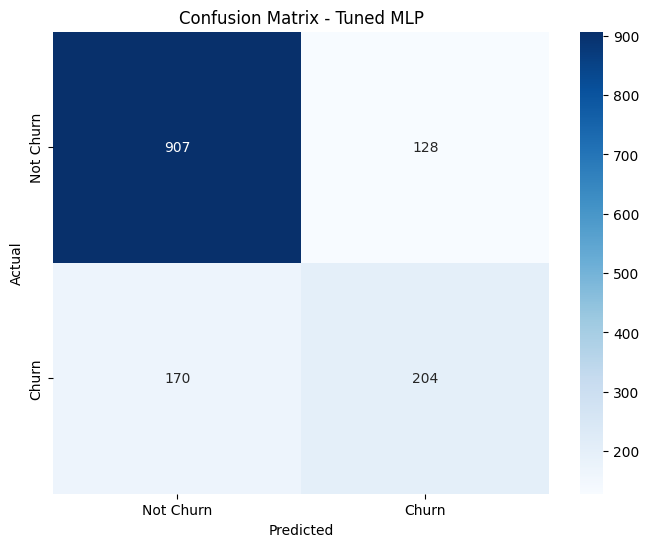

In [25]:
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
print("Confusion Matrix:")
print(cm_tuned)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Tuned MLP')
plt.show()

In [24]:
print("Classification Report:")
print(classification_report(y_test, y_pred_tuned))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1035
           1       0.61      0.55      0.58       374

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.78      1409



Comparison

In [26]:
comparison_df = pd.DataFrame({
    'Model': ['MLP Basic', 'MLP Deeper', 'MLP Tuned'],
    'Accuracy': [accuracy_basic, accuracy_deeper, accuracy_tuned],
    'Precision': [precision_basic, precision_deeper, precision_tuned],
    'Recall': [recall_basic, recall_deeper, recall_tuned],
    'F1-Score': [f1_basic, f1_deeper, f1_tuned],
    'AUC-ROC': [auc_basic, auc_deeper, auc_tuned]
})

print(comparison_df.round(4))

        Model  Accuracy  Precision  Recall  F1-Score  AUC-ROC
0   MLP Basic    0.7842     0.6029  0.5481    0.5742   0.8323
1  MLP Deeper    0.7899     0.6189  0.5428    0.5783   0.8338
2   MLP Tuned    0.7885     0.6145  0.5455    0.5779   0.8341


In [27]:
best_models = {}
for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']:
    best_idx = comparison_df[metric].idxmax()
    best_model = comparison_df.loc[best_idx, 'Model']
    best_score = comparison_df.loc[best_idx, metric]
    best_models[metric] = (best_model, best_score)
    print(f"{metric:12}: {best_model} ({best_score:.4f})")

# Find overall best model (based on F1-Score as balanced metric)
overall_best_model = comparison_df.loc[comparison_df['F1-Score'].idxmax(), 'Model']
overall_best_f1 = comparison_df['F1-Score'].max()

print(f"OVERALL BEST MLP MODEL: {overall_best_model}")
print(f"Best F1-Score: {overall_best_f1:.4f}")

Accuracy    : MLP Deeper (0.7899)
Precision   : MLP Deeper (0.6189)
Recall      : MLP Basic (0.5481)
F1-Score    : MLP Deeper (0.5783)
AUC-ROC     : MLP Tuned (0.8341)
OVERALL BEST MLP MODEL: MLP Deeper
Best F1-Score: 0.5783


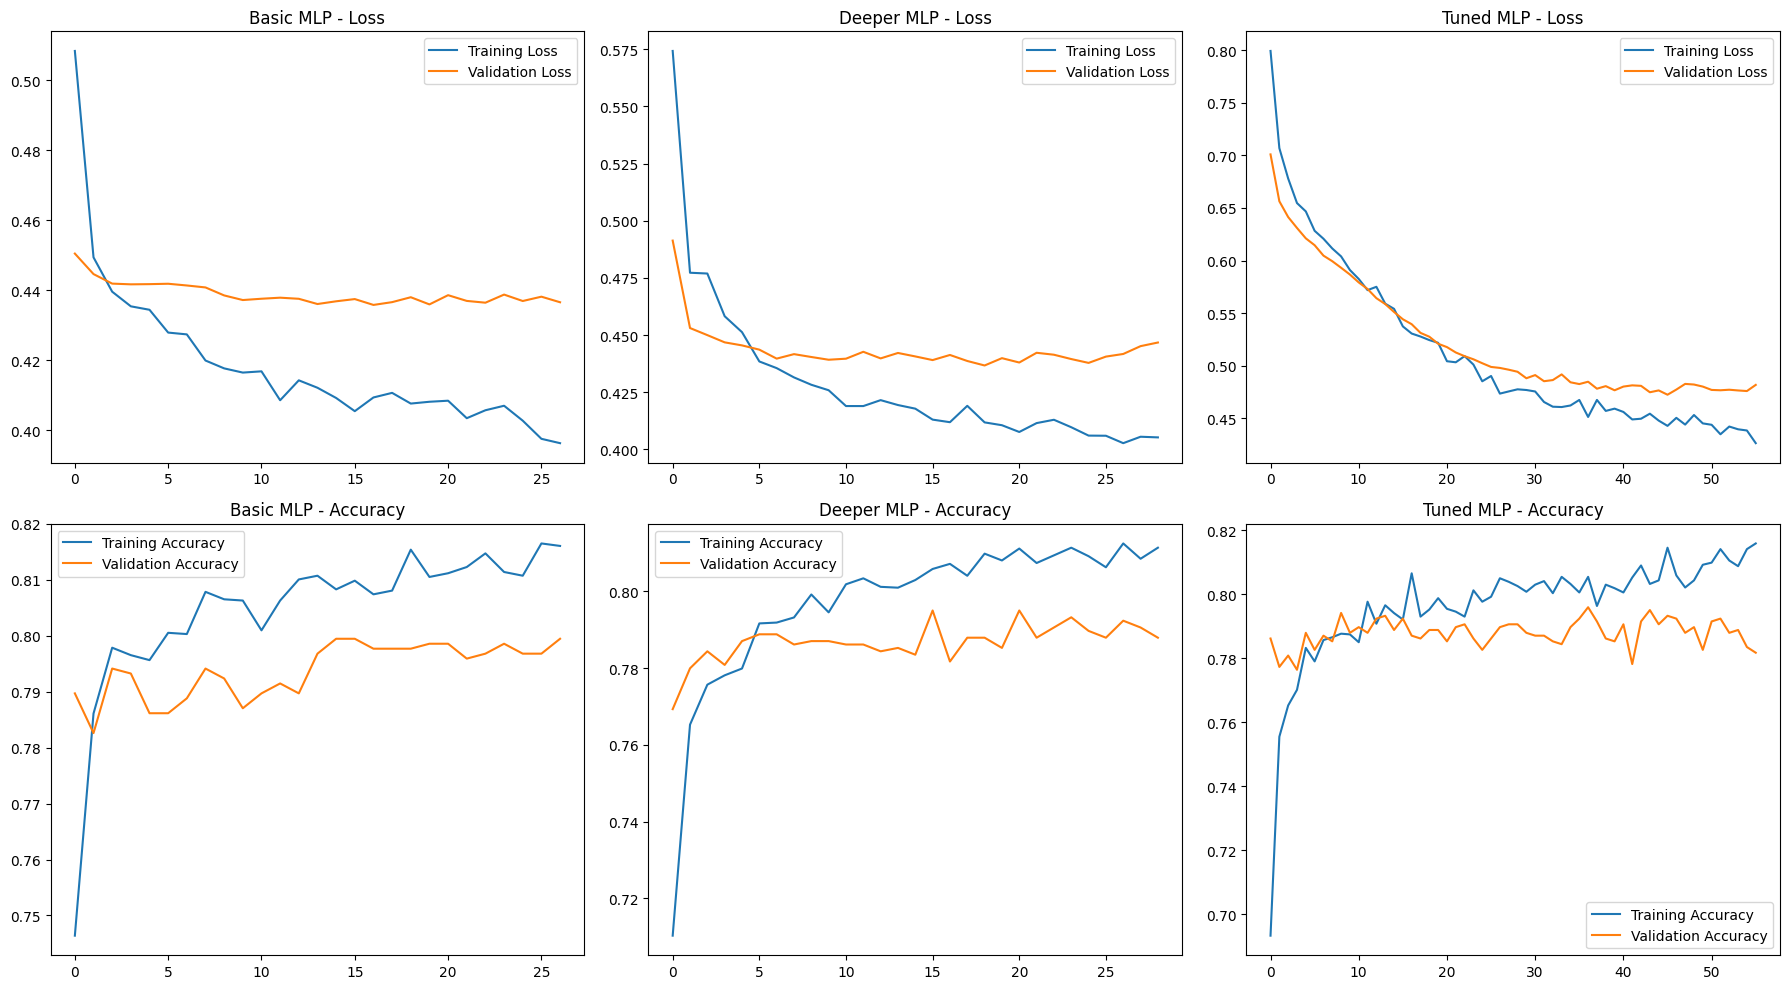

In [28]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Basic MLP history
axes[0,0].plot(history_basic.history['loss'], label='Training Loss')
axes[0,0].plot(history_basic.history['val_loss'], label='Validation Loss')
axes[0,0].set_title('Basic MLP - Loss')
axes[0,0].legend()

axes[1,0].plot(history_basic.history['accuracy'], label='Training Accuracy')
axes[1,0].plot(history_basic.history['val_accuracy'], label='Validation Accuracy')
axes[1,0].set_title('Basic MLP - Accuracy')
axes[1,0].legend()

# Deeper MLP history
axes[0,1].plot(history_deeper.history['loss'], label='Training Loss')
axes[0,1].plot(history_deeper.history['val_loss'], label='Validation Loss')
axes[0,1].set_title('Deeper MLP - Loss')
axes[0,1].legend()

axes[1,1].plot(history_deeper.history['accuracy'], label='Training Accuracy')
axes[1,1].plot(history_deeper.history['val_accuracy'], label='Validation Accuracy')
axes[1,1].set_title('Deeper MLP - Accuracy')
axes[1,1].legend()

# Tuned MLP history
axes[0,2].plot(history_tuned.history['loss'], label='Training Loss')
axes[0,2].plot(history_tuned.history['val_loss'], label='Validation Loss')
axes[0,2].set_title('Tuned MLP - Loss')
axes[0,2].legend()

axes[1,2].plot(history_tuned.history['accuracy'], label='Training Accuracy')
axes[1,2].plot(history_tuned.history['val_accuracy'], label='Validation Accuracy')
axes[1,2].set_title('Tuned MLP - Accuracy')
axes[1,2].legend()

plt.tight_layout()
plt.show()

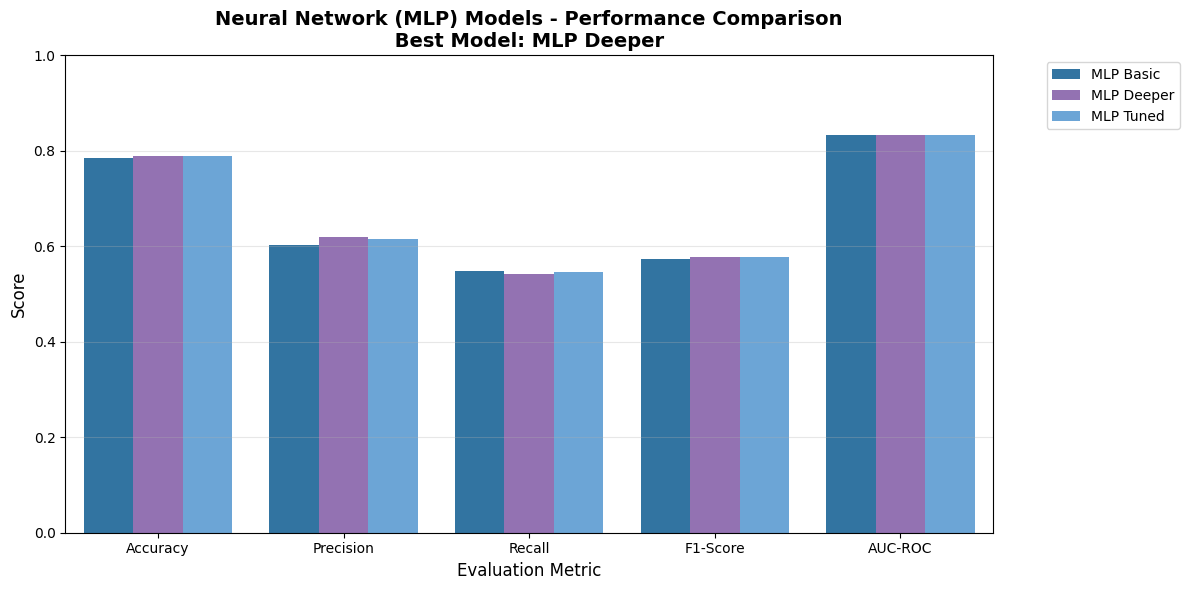

In [32]:
comparison_melted = comparison_df.melt(
    'Model',
    var_name='Metric',
    value_name='Score',
    value_vars=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']
)

# Highlight the best model in the plot
colors = ['#1f77b4', '#3a8ecd', '#5aa6e8', '#7bbffe']
highlight_color = '#9467bd'

# Find index of best model
best_model_idx = comparison_df['Model'].tolist().index(overall_best_model)

# Create custom palette with best model highlighted
custom_palette = [highlight_color if i == best_model_idx else colors[i] for i in range(3)]

plt.figure(figsize=(12, 6))
sns.barplot(x='Metric', y='Score', hue='Model', data=comparison_melted,
            palette=custom_palette)
plt.title(f'Neural Network (MLP) Models - Performance Comparison\n Best Model: {overall_best_model} ',
          fontsize=14, fontweight='bold')
plt.ylabel('Score', fontsize=12)
plt.xlabel('Evaluation Metric', fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()